In [1]:
#
## CS 462 project
## Rasmus Smidtslund
## 4/20/2023
#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder # used for feature selection
from sklearn.preprocessing import OneHotEncoder 
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

from sklearn import tree

import copy as cp
from typing import Tuple

from sklearn import metrics

In [3]:
## read and explore data
data = pd.read_csv("mushrooms.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


C:\Users\rsmid\AppData\Local\Temp/ipykernel_40252/570997909.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(1, 1, figsize=(10,4))


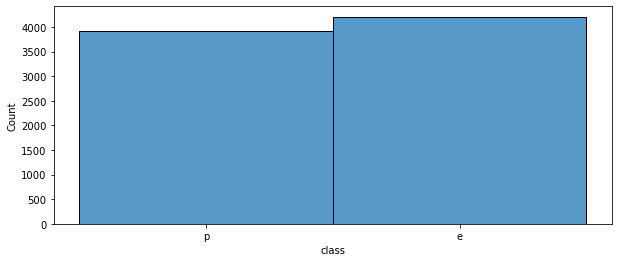

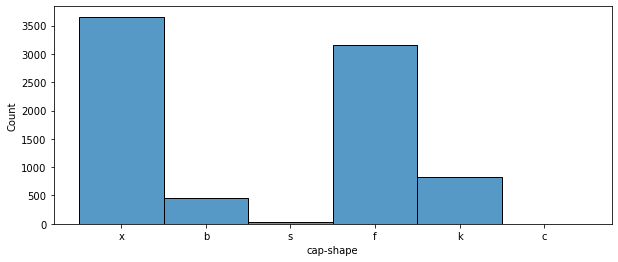

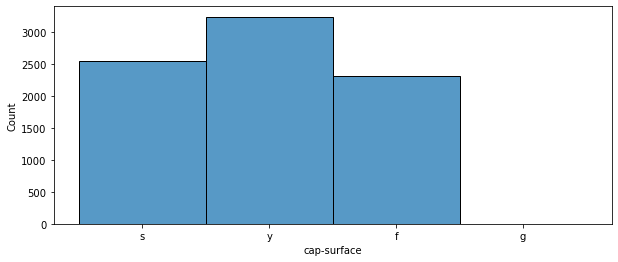

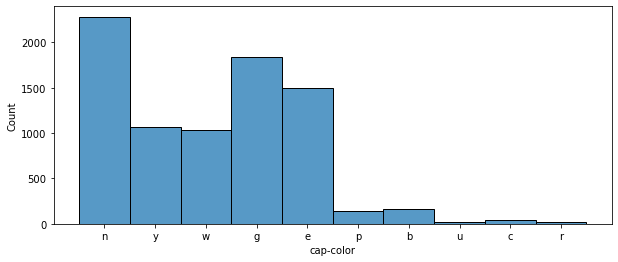

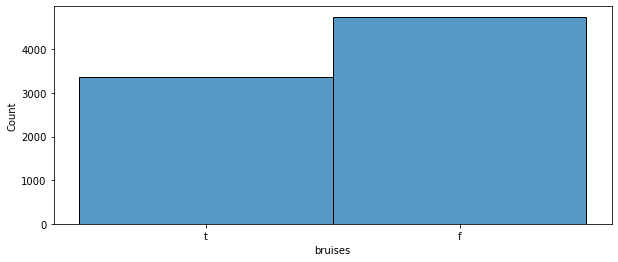

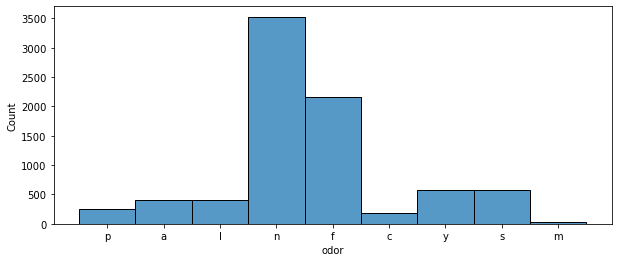

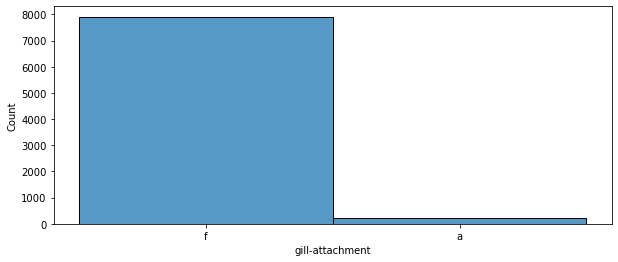

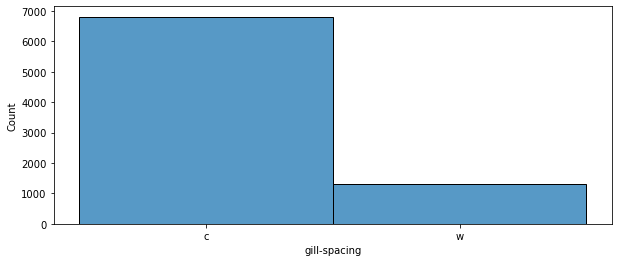

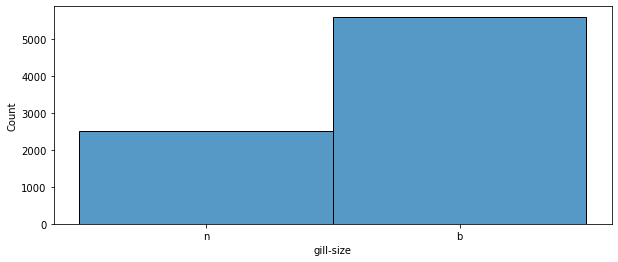

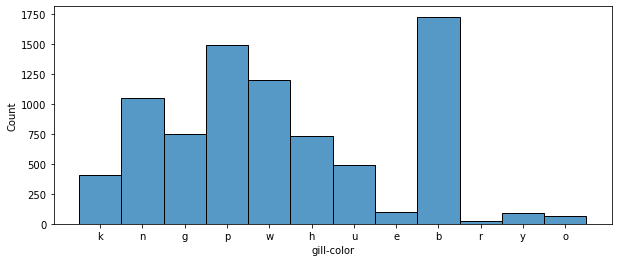

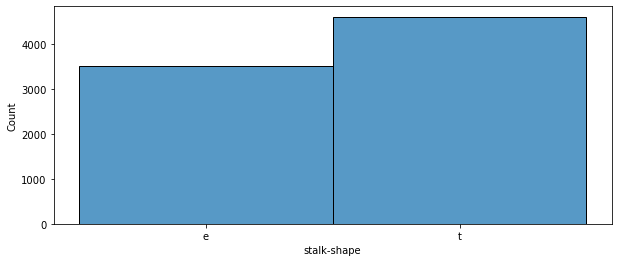

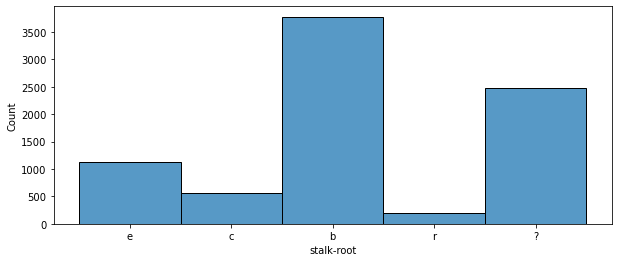

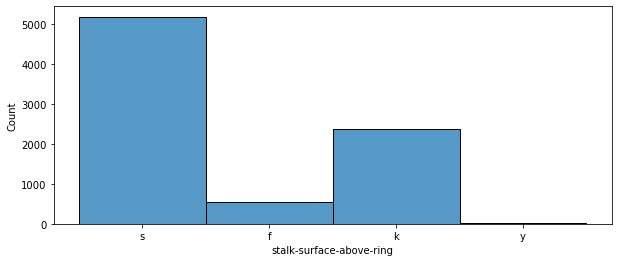

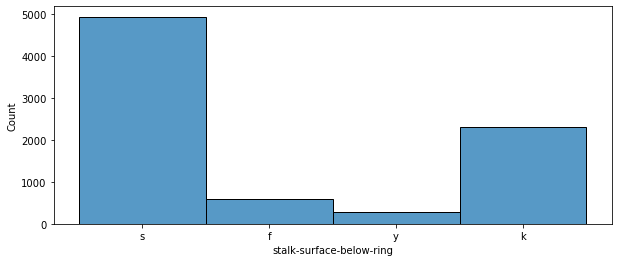

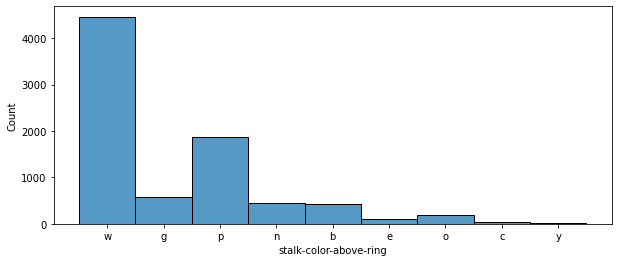

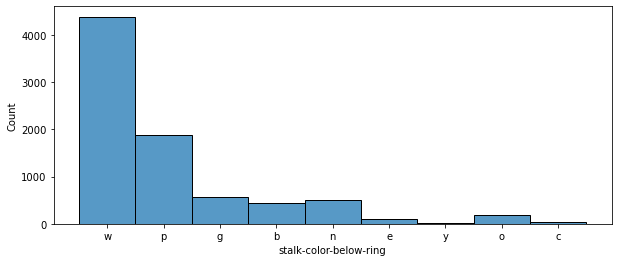

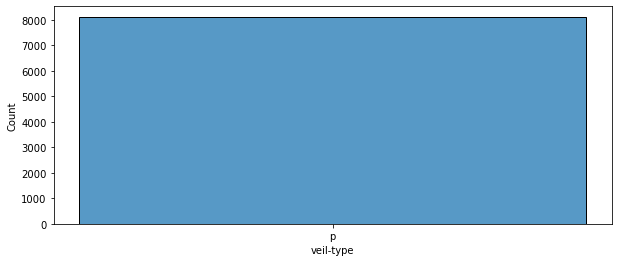

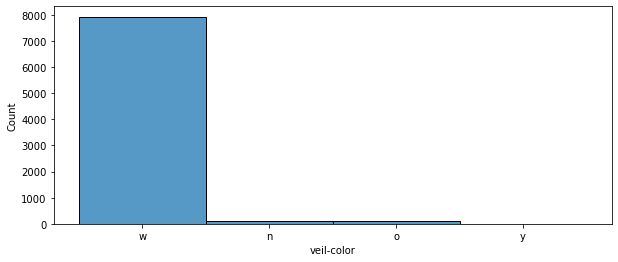

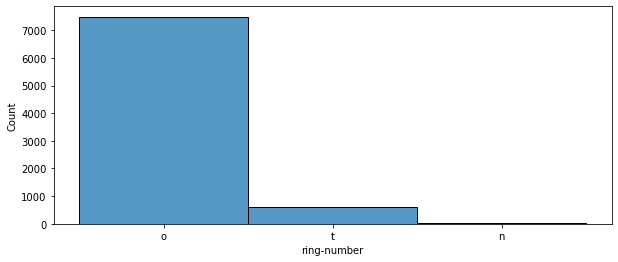

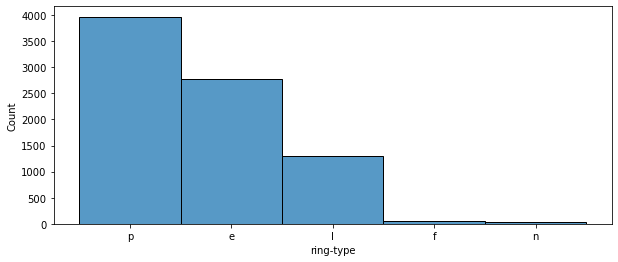

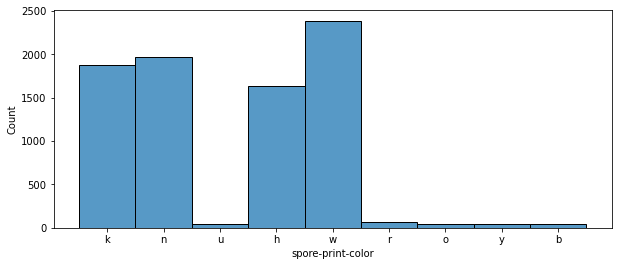

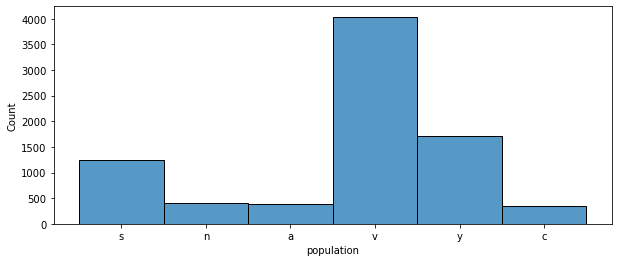

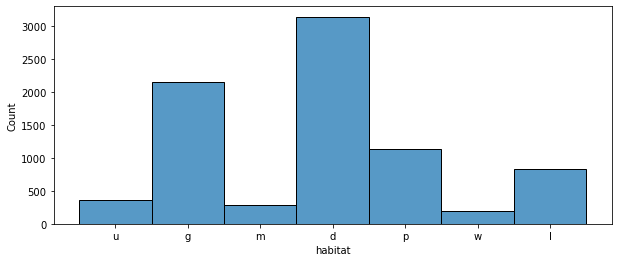

In [6]:
## visualize each attribute (all categorical)

nom_attributes = data.select_dtypes(include=[object]).columns
for col in nom_attributes:
    fig = plt.subplots(1, 1, figsize=(10,4))
    sns.histplot(data=data, x=col)

In [7]:
#
## findings
#

# distribution between poisonous and edible close to equal (good thing) -> binary classification
# 'veil-type' only one class (remove)
# 'bruises' (T/F), 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape' have only two classes

In [8]:
## remove attribute 'veil-type'
data.drop(columns=['veil-type'],inplace=True)

In [9]:
#
## NEXT STEPS
### encoding
### feature selection using either Chi-Squared Feature Selection or Mutual Information Feature Selection
### https://machinelearningmastery.com/feature-selection-with-categorical-data/
#

In [10]:
## split data into input (X) and output (y) variables
dataset = data.values
X = dataset[:,1::]
y = dataset[:,0:1]

In [11]:
X.shape, y.shape

((8124, 21), (8124, 1))

In [12]:
#
## Architecture notes
### first split data into training and validation so that there will be unseen data once the full model is complete 
### 20% for validation
#

In [13]:
## split data into training (for cv) and validation
X1, X_valid, y1, y_valid = train_test_split(X, y, test_size=0.20, random_state=51)

In [14]:
X1.shape, y1.shape, X_valid.shape, y_valid.shape

((6499, 21), (6499, 1), (1625, 21), (1625, 1))

In [15]:
## create a dataframe of validation data
attribute_names = list(data.columns)[1::]
validation_data = pd.DataFrame(data=X_valid, columns=attribute_names)
validation_data['class']=y_valid

In [16]:
validation_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,y,n,t,n,f,c,b,e,e,...,s,w,e,w,t,e,w,c,w,e
1,f,y,y,f,f,f,c,b,h,e,...,k,p,b,w,o,l,h,v,d,p
2,x,y,w,t,l,f,c,b,g,e,...,s,w,w,w,o,p,k,s,g,e
3,f,f,g,f,n,f,w,b,n,t,...,s,w,w,w,o,e,n,s,g,e
4,x,y,e,t,n,f,c,b,w,t,...,s,w,w,w,o,p,n,y,d,e


In [17]:
validation_data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,1625,1625,1625,1625,1625,1625,1625,1625,1625,1625,...,1625,1625,1625,1625,1625,1625,1625,1625,1625,1625
unique,6,3,10,2,9,2,2,2,12,2,...,4,9,9,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,w,o,p,w,v,d,e
freq,723,652,449,949,723,1591,1354,1125,343,929,...,982,899,889,1594,1485,788,481,788,632,855


<AxesSubplot:xlabel='class', ylabel='Count'>

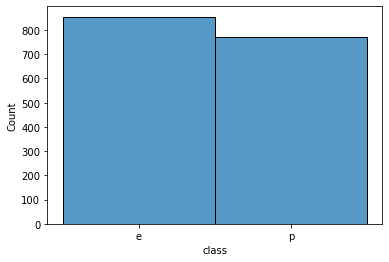

In [18]:
## check the distribution of 'class' in the validation data
sns.histplot(data=validation_data, x='class')

In [19]:
## NEXT
### get a benchmark by trying a simple approach (Naive Bayes, K-NN) before feature selection

## create a dataframe of training&testing data
attribute_names = list(data.columns)[1::]
training_data = pd.DataFrame(data=X1, columns=attribute_names)
training_data['class']=y1

In [20]:
training_data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,w,o,p,w,v,d,e
freq,2933,2592,1835,3799,2805,6323,5458,4487,1385,3679,...,3954,3565,3495,6330,6003,3180,1907,3252,2516,3353


<AxesSubplot:xlabel='class', ylabel='Count'>

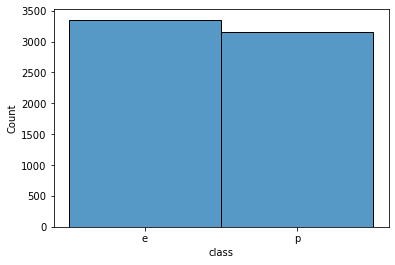

In [21]:
## check the distribution of 'class' in the training data
sns.histplot(data=training_data, x='class')

In [22]:
## save column names of the original training dataset
column_names = list(training_data.columns)

In [23]:
## binary (dummy) encoding
dummy_enc = OneHotEncoder(drop='if_binary')
dummy_enc.fit(training_data)
dummy_encoded_training = dummy_enc.transform(training_data).toarray()

In [24]:
## ordinal encoding (for NB)
ord_enc = OrdinalEncoder()
ord_enc.fit(training_data)
ord_encoded_training = ord_enc.transform(training_data)

In [25]:
## check if encoding was done properly
col_count=0
for val in data.describe().loc["unique"].values:
    if val != 2:
        col_count+=val
    else:
        col_count+=1
        
col_count==len(dummy_encoded_training[0])

True

In [26]:
#dummy_encoded_training[0]

In [27]:
## for knn
X = dummy_encoded_training[:,:-1]
y = dummy_encoded_training[:,-1]

## for nb
X_ord = ord_encoded_training[:,:-1]
y_ord = ord_encoded_training[:,-1]

In [28]:
## complete a simple split to training and testing (for knn)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=51)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4549, 111), (4549,), (1950, 111), (1950,))

In [29]:
## complete a simple split to training and testing (for nb)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_ord,y_ord,test_size=0.30, random_state=51)
X_train_nb.shape, y_train_nb.shape, X_test_nb.shape, y_test_nb.shape

((4549, 21), (4549,), (1950, 21), (1950,))

In [30]:
## implement k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [31]:
## confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
print("k-NN Confusion Matrix:\n", knn_conf_matrix)

k-NN Confusion Matrix:
 [[1019    0]
 [   0  931]]


In [32]:
## accuracy score
knn_acc_score = accuracy_score(y_test, knn_predictions)
print("k-NN Accuracy:", knn_acc_score)

k-NN Accuracy: 1.0


In [33]:
## implement NB
nb = CategoricalNB()
nb.fit(X_train_nb, y_train_nb)
nb_predictions = nb.predict(X_test_nb)

In [34]:
## confusion matrix
nb_conf_matrix = confusion_matrix(y_test_nb, nb_predictions)
print("NB Confusion Matrix:\n", nb_conf_matrix)

NB Confusion Matrix:
 [[1012    7]
 [  99  832]]


In [35]:
## accuracy score
nb_acc_score = accuracy_score(y_test_nb, nb_predictions)
print("NB Accuracy:", nb_acc_score)

NB Accuracy: 0.9456410256410256


In [36]:
## fold accuracy
nb_fold_acc = classification_report(y_test_nb, nb_predictions)
print("NB Classification Report: \n", nb_fold_acc)

NB Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1019
         1.0       0.99      0.89      0.94       931

    accuracy                           0.95      1950
   macro avg       0.95      0.94      0.95      1950
weighted avg       0.95      0.95      0.95      1950



In [37]:
#
## what do we think of this benchmark accuracy?
#

In [38]:
## encode data from nominal to numerical by using ordinal encoder
ord_enc = OrdinalEncoder()
ord_enc.fit(training_data)
ord_encoded_training = ord_enc.transform(training_data)

In [39]:
## split into attributes and labels
X = ord_encoded_training[:,0:-1]
y = ord_encoded_training[:,-1]

In [40]:
#ord_encoded_training

In [41]:
## complete a simple split to training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=51)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4549, 21), (4549,), (1950, 21), (1950,))

In [42]:
#
## feature selection
#

In [43]:
## chi^2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [44]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (column_names[i], fs.scores_[i]))

Feature cap-shape: 16.097146
Feature cap-surface: 131.511998
Feature cap-color: 3.694476
Feature bruises: 679.033702
Feature odor: 47.484497
Feature gill-attachment: 2.386460
Feature gill-spacing: 456.587762
Feature gill-size: 907.444330
Feature gill-color: 3385.844920
Feature stalk-shape: 23.484345
Feature stalk-root: 661.360463
Feature stalk-surface-above-ring: 122.680618
Feature stalk-surface-below-ring: 113.907220
Feature stalk-color-above-ring: 71.013750
Feature stalk-color-below-ring: 55.566174
Feature veil-color: 3.336602
Feature ring-number: 12.967549
Feature ring-type: 1077.126488
Feature spore-print-color: 210.949349
Feature population: 177.720801
Feature habitat: 411.691346


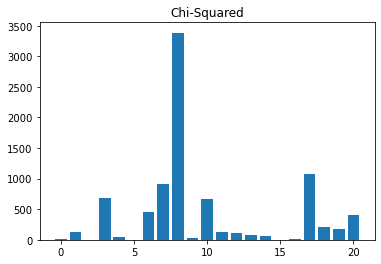

In [45]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Chi-Squared')
plt.show()

In [46]:
## mutual information classification
fs_mic = SelectKBest(score_func=mutual_info_classif, k='all')
fs_mic.fit(X_train, y_train)
X_train_fs_mic = fs_mic.transform(X_train)
X_test_fs_mic = fs_mic.transform(X_test)

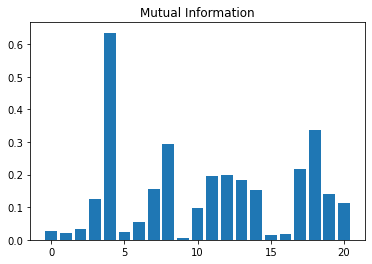

In [47]:
# plot the scores
plt.bar([i for i in range(len(fs_mic.scores_))], fs_mic.scores_)
plt.title('Mutual Information')
plt.show()

In [48]:
# what are scores for the features
for i in range(len(fs_mic.scores_)):
    print('Feature %s: %f' % (column_names[i], fs_mic.scores_[i]))

Feature cap-shape: 0.026703
Feature cap-surface: 0.021197
Feature cap-color: 0.032745
Feature bruises: 0.125183
Feature odor: 0.634712
Feature gill-attachment: 0.022999
Feature gill-spacing: 0.055047
Feature gill-size: 0.154533
Feature gill-color: 0.292393
Feature stalk-shape: 0.005695
Feature stalk-root: 0.098368
Feature stalk-surface-above-ring: 0.195302
Feature stalk-surface-below-ring: 0.198478
Feature stalk-color-above-ring: 0.182833
Feature stalk-color-below-ring: 0.152061
Feature veil-color: 0.014890
Feature ring-number: 0.018543
Feature ring-type: 0.217421
Feature spore-print-color: 0.335842
Feature population: 0.139237
Feature habitat: 0.111443


In [49]:
## save the scores to a dictionary
scores_dict = {'chi^2': fs.scores_, 'mi_score': fs_mic.scores_}

In [50]:
## create a dataframe for scores
scores_df = pd.DataFrame(scores_dict, index=column_names[:-1])

In [51]:
scores_df

,chi^2,mi_score
cap-shape,16.097146,0.026703
cap-surface,131.511998,0.021197
cap-color,3.694476,0.032745
bruises,679.033702,0.125183
odor,47.484497,0.634712
gill-attachment,2.386460,0.022999
gill-spacing,456.587762,0.055047
gill-size,907.444330,0.154533
gill-color,3385.844920,0.292393
stalk-shape,23.484345,0.005695


In [52]:
## currently have 21 features
## -> get subsets of k={15, 10, 8, 5, 3} best using both scores

In [53]:
## select subsets of best performing features

selected_features=[np.zeros(21)]
for k in [15,10,8,5,3]:
    for n in range(21,k,-1):
        chi_list = list(scores_df.nlargest(columns=['chi^2'],n=n).index)
        mic_list = list(scores_df.nlargest(columns=['mi_score'],n=n).index)
        intersection = [feat for feat in chi_list if feat in mic_list]
        if len(intersection)==k:
            selected_features.append(intersection)
        
        
        ## problem seems to be with k={10,8}
        ## -> solve heuristically
        else:
            new_mic_list = list(scores_df.nlargest(columns=['mi_score'],n=n+1).index)
            new_intersection = [feat for feat in chi_list if feat in new_mic_list]
            if len(new_intersection)==k:
                selected_features.append(new_intersection)
                
## delete duplicates
selected_features = [selected_features[i] for i in range(1,len(selected_features)) if len(selected_features[i])<len(selected_features[i-1])]

## reverse
selected_features_rvrsd = selected_features[::-1]

## add all features to the end and spin
selected_features_rvrsd.append(column_names[:-1])
selected_features = selected_features_rvrsd[::-1]

In [54]:
## make sure have all subsets
for k_best in selected_features:
    print(len(k_best))

21
15
10
8
5
3


In [55]:
## selected top 5 features
selected_features[-2]

['gill-color', 'ring-type', 'gill-size', 'spore-print-color', 'population']

In [56]:
#
## cross-validate with k={all, 15, 10, 8, 5, 3} features and see how scores differ on average using each algorithm
#

In [57]:
## y (label/output) is constant
y = training_data.iloc[:,-1]

nb_averages = []
knn_averages = []
dt_averages = []

## get X (inputs)
for k_select_feat in selected_features:
    X = training_data[k_select_feat]
    #print(X.shape, y.shape)
    
    ## encode X and y
    ## binary (dummy) encoding
    enc = OneHotEncoder(drop='if_binary')
    enc.fit(X)
    encoded_X = enc.transform(X).toarray()
    
    ## for nb
    ord_enc = OrdinalEncoder()
    ord_enc.fit(X)
    ord_encoded_X = ord_enc.transform(X)
    
    le = LabelEncoder()
    le.fit(y)
    encoded_y = le.transform(y)
    
    #print(encoded_X.shape, encoded_y.shape)
    
    # implementing 10 fold cross validation

    k=10
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    nb = CategoricalNB()
    knn = KNeighborsClassifier(n_neighbors=5)
    dt = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
    
    #model = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
    num_feat = len(k_select_feat)

    #acc_score = []
    nb_acc_score = []
    knn_acc_score = []
    dt_acc_score = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = encoded_X[train_index,:], encoded_X[test_index,:]
        y_train, y_test = encoded_y[train_index], encoded_y[test_index]
        
        X_train_nb, X_test_nb = ord_encoded_X[train_index,:], ord_encoded_X[test_index,:]
        #y_train_nb, y_test_nb = ord_encoded_y[train_index], ord_encoded_y[test_index]

        nb.fit(X_train_nb,y_train)
        knn.fit(X_train,y_train)
        dt.fit(X_train,y_train)
        
        #predictions = knn.predict(X_test)
        nb_predictions = nb.predict(X_test_nb)
        knn_predictions = knn.predict(X_test)
        dt_predictions = dt.predict(X_test)

        #accuracy = accuracy_score(predictions, y_test)
        nb_accuracy = accuracy_score(nb_predictions, y_test)
        knn_accuracy = accuracy_score(knn_predictions, y_test)
        dt_accuracy = accuracy_score(dt_predictions, y_test)
        
        #acc_score.append(accuracy)
        nb_acc_score.append(nb_accuracy)
        knn_acc_score.append(knn_accuracy)
        dt_acc_score.append(dt_accuracy)

    #avg_acc_score = sum(acc_score)/k
    nb_avg_acc_score = sum(nb_acc_score)/k
    knn_avg_acc_score = sum(knn_acc_score)/k
    dt_avg_acc_score = sum(dt_acc_score)/k
    
    nb_averages.append(nb_avg_acc_score)
    knn_averages.append(knn_avg_acc_score)
    dt_averages.append(dt_avg_acc_score)

    #print('accuracy of each fold - {}'.format(acc_score))
    #print('{}'.format(dt),'with {} features;'.format(num_feat),'avg accuracy : {}'.format(dt_avg_acc_score))


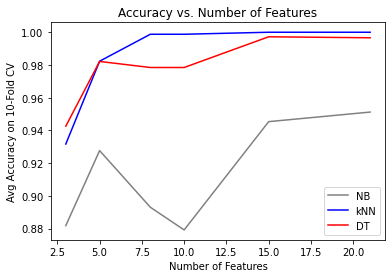

In [58]:
## visualize test results
plt.plot([21,15,10,8,5,3],nb_averages, c='grey', label='NB')
plt.plot([21,15,10,8,5,3],knn_averages, c='blue', label='kNN')
plt.plot([21,15,10,8,5,3],dt_averages, c='red', label='DT')

plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Avg Accuracy on 10-Fold CV')
plt.legend()

plt.show()

In [59]:
### NEXT
## test knn vs dt w/ 5 and 15 feats
## plot conf matrixes and assign cost for falsely predicting a poisonous mushroom as edible

In [60]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [61]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

In [62]:
## get encoded training with 5 and 15 features
validation_data.shape, training_data.shape

((1625, 22), (6499, 22))

In [63]:
five_feat = selected_features[-2]
fifteen_feat = selected_features[-5]

X_5 = training_data[five_feat]
X_15 = training_data[fifteen_feat]

y = training_data.iloc[:,-1]

## encode X's and y

## binary (dummy) encoding
enc = OneHotEncoder(drop='if_binary')
enc.fit(X_5)
encoded_X_5 = enc.transform(X_5).toarray()

enc2 = OneHotEncoder(drop='if_binary')
enc2.fit(X_15)
encoded_X_15 = enc2.transform(X_15).toarray()

le = LabelEncoder()
le.fit(y)
encoded_y = le.transform(y)

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
dt = tree.DecisionTreeClassifier(random_state=0, max_depth=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=51)

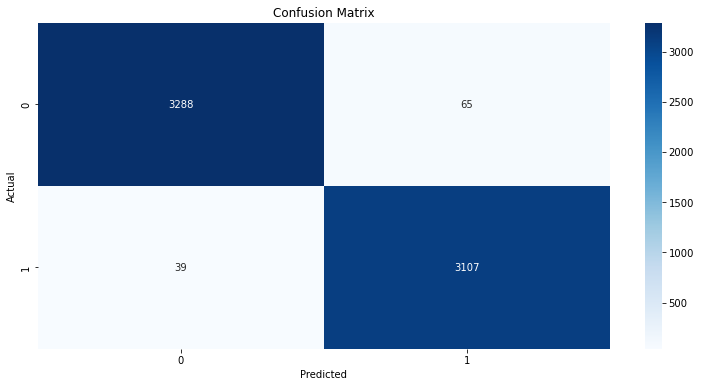

In [65]:
actual_classes, predicted_classes, _ = cross_val_predict(knn, kfold, encoded_X_5, encoded_y)
plot_confusion_matrix(actual_classes, predicted_classes, [0,1])

In [66]:
y.value_counts()

e    3353
p    3146
Name: class, dtype: int64

In [67]:
## aggregated classification report
report = classification_report(actual_classes, predicted_classes)
print("{}\n".format(knn),"Classification Report: \n", report)

KNeighborsClassifier()
 Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3353
           1       0.98      0.99      0.98      3146

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499



In [68]:
## accuracy score
acc_score = accuracy_score(actual_classes, predicted_classes)
print("{}\n".format(knn),"Accuracy:", acc_score)

KNeighborsClassifier()
 Accuracy: 0.983997538082782


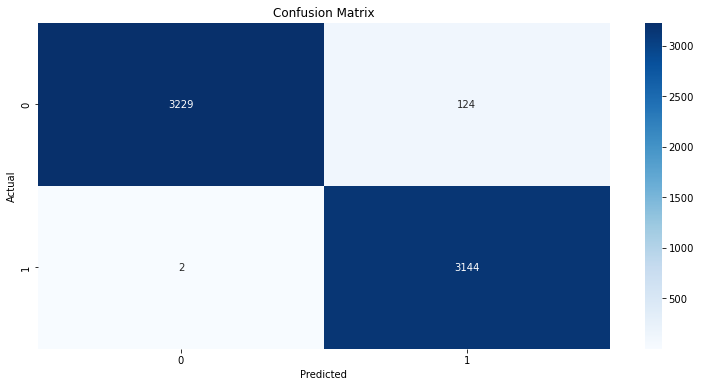

In [69]:
actual_classes, predicted_classes, _ = cross_val_predict(dt, kfold, encoded_X_5, encoded_y)
plot_confusion_matrix(actual_classes, predicted_classes, [0,1])

In [70]:
## aggregated classification report
report = classification_report(actual_classes, predicted_classes)
print("{}\n".format(dt),"Classification Report: \n", report)

DecisionTreeClassifier(max_depth=5, random_state=0)
 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3353
           1       0.96      1.00      0.98      3146

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499



In [71]:
## accuracy score
acc_score = accuracy_score(actual_classes, predicted_classes)
print("{}\n".format(dt),"Accuracy:", acc_score)

DecisionTreeClassifier(max_depth=5, random_state=0)
 Accuracy: 0.9806124019079858


In [72]:
#
## with the cost for falsely prediciting a mushroom to be edible when it's poisonous, 
## dt model is to be chosen from the two as the final model
#

In [73]:
## train with all the training data and test on validation data
train_X_5 = training_data[five_feat]
train_y = training_data.iloc[:,-1]

valid_X_5 = validation_data[five_feat]
valid_y = validation_data.iloc[:,-1]

## encode X's and y

## binary (dummy) encoding
enc = OneHotEncoder(drop='if_binary')

## fit with training, transform both
enc.fit(train_X_5)
enc_train_X_5 = enc.transform(train_X_5).toarray()
enc_valid_X_5 = enc.transform(valid_X_5).toarray()


le = LabelEncoder()
le.fit(train_y)
enc_train_y = le.transform(train_y)
enc_valid_y = le.transform(valid_y)

## training data
enc_train_X_5.shape, enc_train_y.shape, enc_valid_X_5.shape, enc_valid_y.shape

((6499, 33), (6499,), (1625, 33), (1625,))

In [74]:
## implement final model
final_dt = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
final_dt.fit(enc_train_X_5, enc_train_y)

DecisionTreeClassifier(max_depth=5, random_state=0)

[Text(200.88000000000002, 199.32, 'X[17] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3353, 3146]'),
 Text(133.92000000000002, 163.07999999999998, 'X[19] <= 0.5\ngini = 0.422\nsamples = 4487\nvalue = [3131, 1356]'),
 Text(100.44000000000001, 126.83999999999999, 'X[23] <= 0.5\ngini = 0.051\nsamples = 3215\nvalue = [3131, 84]'),
 Text(66.96000000000001, 90.6, 'X[15] <= 0.5\ngini = 0.018\nsamples = 3160\nvalue = [3131, 29]'),
 Text(33.480000000000004, 54.359999999999985, 'gini = 0.0\nsamples = 3131\nvalue = [3131, 0]'),
 Text(100.44000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(167.40000000000003, 126.83999999999999, 'gini = 0.0\nsamples = 1272\nvalue = [0, 1272]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.196\nsamples = 2012\nvalue = [222, 1790]'),
 Text(234.36, 126.83999999999999, 'X[30] <= 0.5\ngini = 0.457\nsamples = 627\nvalue = [222, 405]

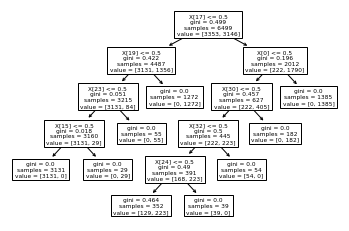

In [75]:
## visualize the final dt
tree.plot_tree(final_dt)

In [76]:
## test the final dt model
predictions = final_dt.predict(enc_valid_X_5)

In [77]:
## confusion matrix
conf_matrix = confusion_matrix(enc_valid_y, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[816  39]
 [  0 770]]


In [78]:
## classification report
report = classification_report(enc_valid_y, predictions)
print("\n Classification Report: \n", report)


 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       855
           1       0.95      1.00      0.98       770

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [79]:
## accuracy score
acc_score = accuracy_score(enc_valid_y, predictions)
print("Accuracy:", acc_score)

Accuracy: 0.976


In [80]:
## ROC curve of the final model

# define metrics
y_pred_probab = final_dt.predict_proba(enc_valid_X_5)[::,1]
fpr, tpr, _ = metrics.roc_curve(enc_valid_y,  y_pred_probab)
auc = metrics.roc_auc_score(enc_valid_y, y_pred_probab)

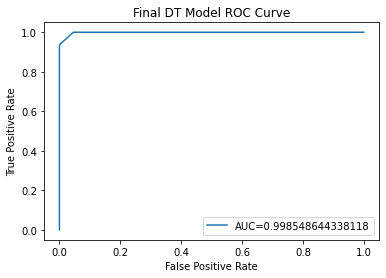

In [81]:
# create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.title("Final DT Model ROC Curve")
plt.show()

In [83]:
## number of attributes with 5 dummy encoded variables
len(enc_valid_X_5[0])

33